In [2]:
import numpy as np
from classcode.read_sdss_fits import read_sdss_fits
from classcode.setupdir import notes_home_dir
from classcode.setupdir import code_home_dir
from classcode.setupdir import data_home_dir
# This should simply point to the current directory
print(notes_home_dir())

# And these to the code and data directories
print(code_home_dir())
print(data_home_dir())


/Users/Jenny/Documents/ASTR214
/Users/Jenny/Documents/ASTR214/classcode
/Users/Jenny/Documents/ASTR214/data


In [3]:
# You can add this to the top of notebooks in order to make pretty inline figures
# Make sure to run these notebooks from the current directory so that you can acess the code under /classcode.
# Try running this cell to see if you have everything set up correctly so far
# you should get no error messages

%matplotlib inline
import matplotlib.pyplot as plt

from classcode.plot_utils import plot_pretty
plot_pretty(dpi=300)

In [6]:
from classcode.read_sdss_fits import read_sdss_fits
from classcode.setupdir import data_home_dir

# The print out below should show the directory where the sdss data file is stored
# It should be: /your_path/ASTR214_2017/data
data_home_dir()
print(data_home_dir())

# read fits file with the SDSS DR8 main spectroscopic sample
data = read_sdss_fits(data_home_dir()+'/SDSSspecgalsDR8full.fits')

/Users/Jenny/Documents/ASTR214/data


In [7]:
import pyfits

hdulist = pyfits.open(data_home_dir()+'/SDSSspecgalsDR8full.fits')

print(hdulist[1].columns.names)

['ra', 'dec', 'mjd', 'plate', 'fiberID', 'class', 'z', 'zErr', 'rChi2', 'velDisp', 'velDispErr', 'extinction_r', 'extinction_g', 'petroMag_r', 'psfMag_r', 'psfMagErr_r', 'modelMag_u', 'modelMagErr_u', 'modelMag_g', 'modelMagErr_g', 'modelMag_r', 'modelMagErr_r', 'modelMag_i', 'modelMagErr_i', 'modelMag_z', 'modelMagErr_z', 'cmodelMag_u', 'cmodelMagErr_u', 'cmodelMag_g', 'cmodelMagErr_g', 'cmodelMag_r', 'cmodelMagErr_r', 'cmodelMag_i', 'cmodelMagErr_i', 'petroR50_r', 'petroR90_r', 'petroR50Err_r', 'petroR90Err_r', 'fracdeV_r', 'expRad_r', 'expRadErr_r', 'deVRad_r', 'deVRadErr_r', 'deVMag_r', 'deVMagErr_r', 'expMag_r', 'expMagErr_r', 'lnLDeV_r', 'lnLExp_r', 'deVAB_r', 'deVABErr_r', 'expAB_r', 'expABErr_r', 'h_alpha_flux', 'h_alpha_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err', 'd4000', 'd4000_err', 'bptclass', 'lgm_tot_p50', 'sfr_tot_p50', 'objID', 'specObjID']


[ 15.9179287   17.65951347  17.59069061 ...,  17.32640839  17.72260666
  17.77665329]
selected 245592 galaxies


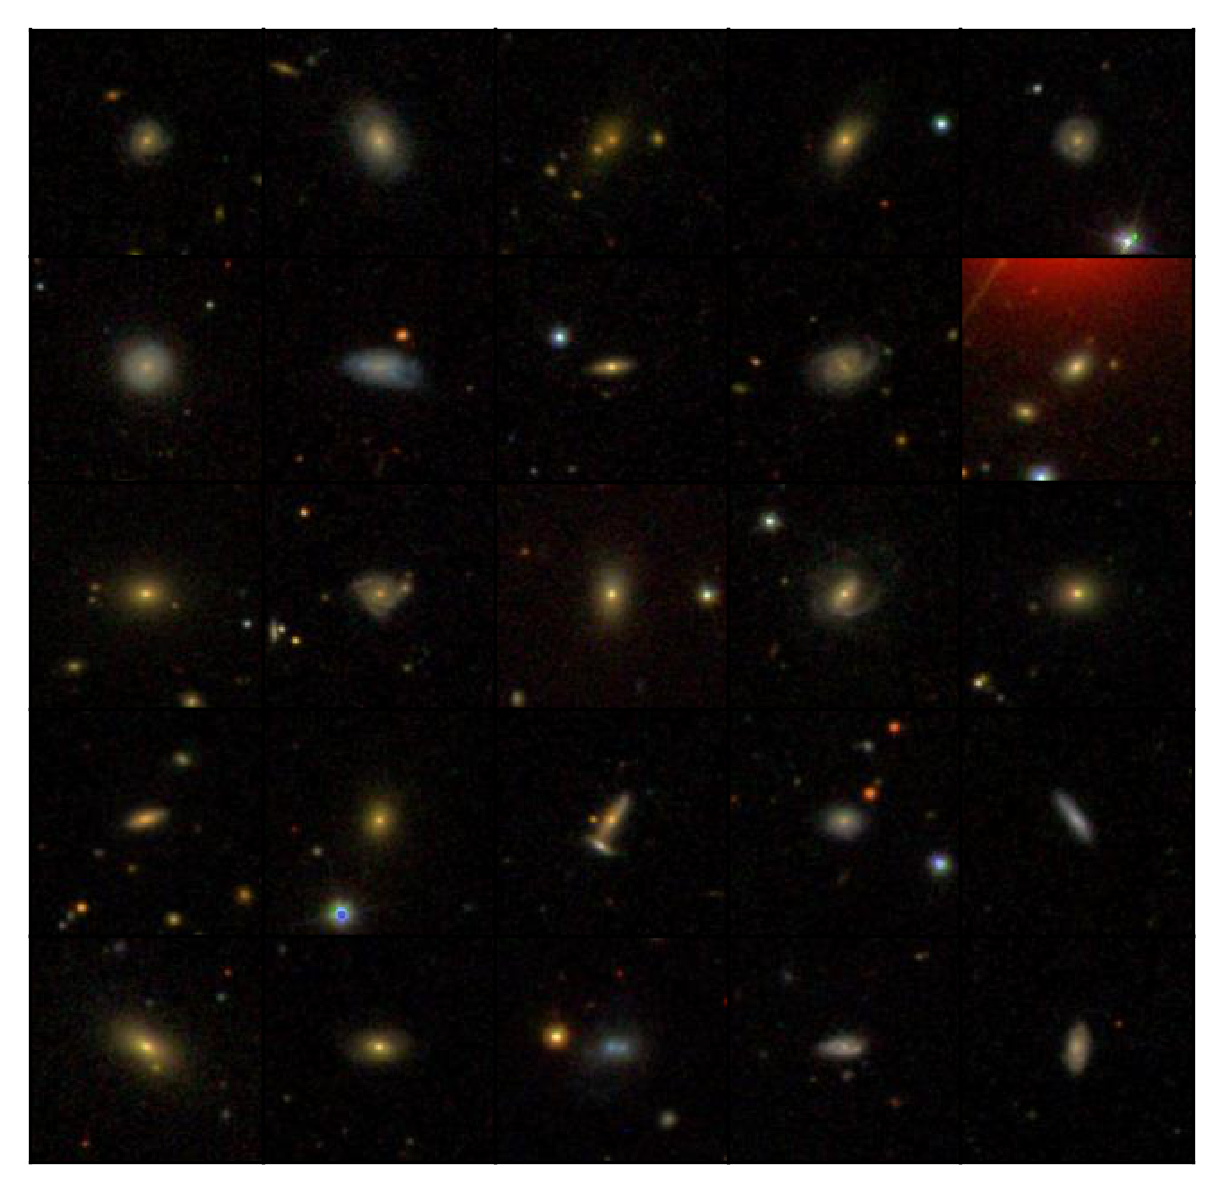

In [8]:
import numpy as np
from classcode.plot_utils import sdss_img_collage

# the number of rows and columns in the image collage
nrow = 5; ncol = 5

# pixel size of the thumbnails to extract from SDSS
npix = 130

# R band magnitude
mcmodel = data['cmodelMag_r']
print(mcmodel)

# select galaxies brighter than 17th magnitude in the r-band
rdata = data[mcmodel<17]
print("selected %d galaxies"%np.size(rdata))

# select a random subset of galaxies from the selected subset
iran = np.random.randint(0., np.size(rdata)-1, nrow*ncol)

# get data for the randomly selected galaxies
dshow = rdata[iran]
objs = dshow['objID']; ras = dshow['ra']; decs = dshow['dec']

# get images (if they are not yet on disk) and display the collage 
sdss_img_collage(objs, ras, decs, nrow, ncol, npix, scale=0.5)

In [10]:
from colossus.cosmology import cosmology

# set cosmology to the best values from 9-year WMAP data
cosmo = cosmology.setCosmology('WMAP9')

# Print the values of this cosmology
print(cosmo)

# What does flat=True mean?

# Pay particular attention to the value of the hubble constant!

print("\n Pay attention to the value of this parameter: h=",cosmo.h)
    

Cosmology "WMAP9", flat = True, relspecies = True, 
    Om0 = 0.2865, OL0 = 0.7134, Ob0 = 0.0463, H0 = 69.32, sigma8 = 0.8200, ns = 0.9608, 
    Tcmb0 = 2.7255, Neff = 3.0460, PL = False, PLn = 0.0000

 Pay attention to the value of this parameter: h= 0.6931999999999999


In [11]:
# compute luminosity distance 
z=0.5
d_L = cosmo.luminosityDistance(z)/cosmo.h
print(d_L)

#and angular diameter distances
d_A = d_L/(1.+z)**2
print(d_A)


2874.08968596
1277.37319376
